In [1]:
import mglearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [2]:
X,y = mglearn.datasets.make_wave(n_samples=120)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1,1)

In [5]:
reg = DecisionTreeRegressor(min_samples_leaf=3).fit(X,y)
reg2 = LinearRegression().fit(X,y)

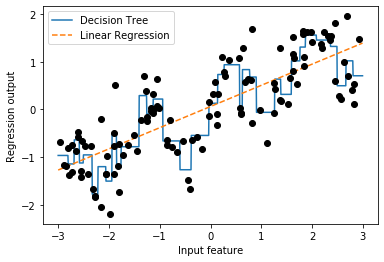

In [10]:
plt.plot(line, reg.predict(line), label="Decision Tree")
plt.plot(line, reg2.predict(line),'--', label="Linear Regression")
plt.plot(X[:,0],y,'o',c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc='best')

- 위와 같이 선형 모델은 특성이 하나일 땐 직선으로만 표현 가능.
- 연속형 데이터에 강력한 선형 모델을 만드는 방법 중 하나는 구간분할(bining, 이산화)
- 입력값 범위를 나누어, 각 데이터포인트가 어느 구간에 속하는지 나타내어 학습 진행.
- 입력값 범위를 나눌 땐 균일한 너비로 나눌 수 있고, 데이터 분위를 사용할 수도 있음.
- KBinsDiscretizer class 이용
- KBinsDiscretizer는 기본적으로 OneHotEncoding을 적용함.
- 구간마다 하나의 새로운 특성이 생기게 된다. (예를들어 10개 구간으로 분할 할 경우, 10개의 특성이 생기게 됨)

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

In [12]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bins edges:\n", kb.bin_edges_)

bins edges:
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [25]:
X_binned = kb.transform(X)
X_binned.toarray()[:10]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [37]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

In [38]:
X_binned

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

Text(0.5, 0, 'Input feature')

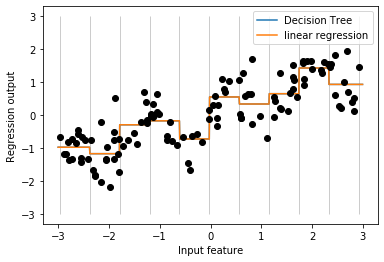

In [39]:
line_binned = kb.transform(line)
reg = DecisionTreeRegressor().fit(X_binned,y)
reg2 = LinearRegression().fit(X_binned,y)
plt.plot(line, reg.predict(line_binned), label="Decision Tree")
plt.plot(line, reg2.predict(line_binned), label="linear regression")
plt.plot(X[:,0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Regression output")
plt.xlabel("Input feature")

- 구간 분할은 decision tress에서는 별로 효율적이지 못함.

# 상호작용과 다항식
- 특성을 풍부하게 나타내는 또 하나의 방법은 원본 데이터에 상호작용(interaction)과 다항식(polynomial)을 추가하는 것

In [47]:
#hstack은 numpy를 horizontal로 합친다.
X_combined = np.hstack([X,X_binned])
reg2 = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])

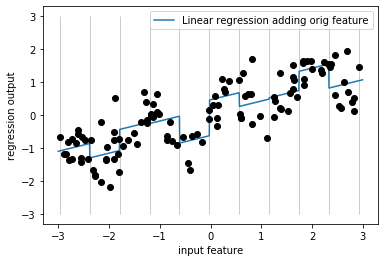

In [48]:
plt.plot(line, reg2.predict(line_combined), label="Linear regression adding orig feature")
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.plot(X[:,0],y,'o',c='k')

- 모든 구간에서 기울기가 동일하여 별로 도움이 되지 못한다.
- 상호작용(interaction) 특성을 추가하여 각 구간에서 다른 기울기를 가지도록

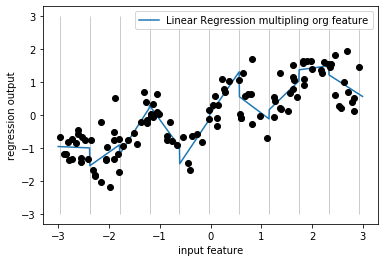

In [50]:
X_product = np.hstack([X_binned, X*X_binned])
reg2 = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg2.predict(line_product), label="Linear Regression multipling org feature")
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.plot(X[:,0],y,'o',c='k')

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [53]:
poly = PolynomialFeatures(degree=10, include_bias=False)
# X**10차 까지 고차항을 추가한다.
#include_bias는 절편에 해당하는 특성을 추가할지 여부
poly.fit(X)
X_poly = poly.transform(X)

In [54]:
print("X values:\n",X[:5])
print("X_poly values:\n",X_poly[:5])

X values:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly values:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [55]:
print(poly.get_feature_names())

['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


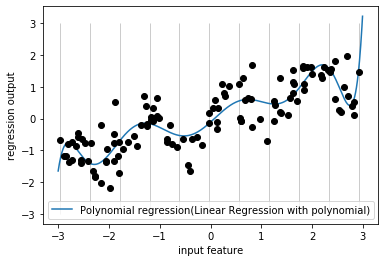

In [56]:
reg2 = LinearRegression().fit(X_poly,y)
line_poly = poly.transform(line)
plt.plot(line, reg2.predict(line_poly), label="Polynomial regression(Linear Regression with polynomial)")
plt.vlines(kb.bin_edges_[0],-3,3,linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("regression output")
plt.xlabel("input feature")
plt.plot(X[:,0],y,'o',c='k')

In [57]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape:",X_train.shape)
print("X_train_poly.shape:",X_train_poly.shape)
# 1(절편)+13(원본특성)+91(두개조합) (91 = 13*14/2)

X_train.shape: (379, 13)
X_train_poly.shape: (379, 105)


- Ridge와 같은 모델에서는 상호작용과 다항식 특성이 성능을 높일 수 있다.
- 하지만 randomforest와 같은 복잡한 모델은 성능이 줄어들 수 있음

In [59]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
ridge2 = Ridge().fit(X_train_poly,y_train)
print("{:.3f}".format(ridge.score(X_test_scaled, y_test)))
print("{:.3f}".format(ridge2.score(X_test_poly, y_test)))

0.621
0.753


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_scaled, y_train)
rf2 = RandomForestRegressor(n_estimators=100, random_state=0).fit(X_train_poly, y_train)
print("{:.3f}".format(r.score(X_test_scaled, y_test)))
print("{:.3f}".format(ridge2.score(X_test_poly, y_test)))